In [ ]:
!pip install minisom
!pip install sklearn-som

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=734551e62c2ea7d2bcb5c94609c88838df850531e94679d2b6019e4ded2f2ab9
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

## EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/training_dataset.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test_dataset.csv')

In [ ]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,8192,2976,85,23,95,72,2436,246,193,64,...,0,0,0,0,0,0,0,0,0,1
1,14089,3104,233,12,150,40,1503,200,251,186,...,0,0,0,0,0,0,0,0,0,1
2,10246,3385,160,7,937,204,1224,228,242,147,...,0,0,0,0,0,0,0,0,0,1
3,8686,3191,41,14,210,37,3207,221,208,119,...,1,0,0,0,0,0,0,0,0,1
4,9242,2821,297,4,85,1,992,208,238,169,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  8286 non-null   int64
 1   Elevation                           8286 non-null   int64
 2   Aspect                              8286 non-null   int64
 3   Slope                               8286 non-null   int64
 4   Horizontal_Distance_To_Hydrology    8286 non-null   int64
 5   Vertical_Distance_To_Hydrology      8286 non-null   int64
 6   Horizontal_Distance_To_Roadways     8286 non-null   int64
 7   Hillshade_9am                       8286 non-null   int64
 8   Hillshade_Noon                      8286 non-null   int64
 9   Hillshade_3pm                       8286 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  8286 non-null   int64
 11  Wilderness_Area1                    8286 non-null   int64
 12  Wilder

In [ ]:
train_data.shape

(8286, 56)

In [ ]:
train_data.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [ ]:
train_data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.00000,...,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000
mean,7609.998431,2732.983104,155.366643,16.868694,225.249698,53.233888,1629.840574,213.732682,218.534999,133.00712,...,0.035723,0.031620,0.001328,0.008810,0.000845,0.003259,0.063481,0.056119,0.040068,4.561550
std,4291.741503,432.906958,108.392758,8.514811,213.670866,62.890107,1259.714393,30.675904,23.142959,46.73019,...,0.185610,0.174996,0.036413,0.093453,0.029055,0.056994,0.243840,0.230165,0.196130,1.789533
min,1.000000,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,58.000000,99.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3889.500000,2350.000000,66.000000,10.000000,60.000000,5.000000,726.000000,197.000000,206.000000,103.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,7479.500000,2720.500000,125.000000,16.000000,175.000000,34.000000,1273.000000,221.000000,222.000000,136.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,11349.750000,3099.750000,252.000000,23.000000,323.000000,84.000000,2155.000000,237.000000,235.000000,166.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.000000,3849.000000,360.000000,50.000000,1343.000000,547.000000,6508.000000,254.000000,254.000000,248.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
train_data.skew()

Id                                     0.046853
Elevation                              0.231034
Aspect                                 0.486825
Slope                                  0.481654
Horizontal_Distance_To_Hydrology       1.563164
Vertical_Distance_To_Hydrology         1.489166
Horizontal_Distance_To_Roadways        1.287637
Hillshade_9am                         -1.134396
Hillshade_Noon                        -0.922196
Hillshade_3pm                         -0.311391
Horizontal_Distance_To_Fire_Points     1.597119
Wilderness_Area1                       1.450438
Wilderness_Area2                       5.458321
Wilderness_Area3                       0.287803
Wilderness_Area4                       0.703206
Soil_Type1                             6.088352
Soil_Type2                             4.356065
Soil_Type3                             3.374927
Soil_Type4                             3.614907
Soil_Type5                             9.129863
Soil_Type6                             4

<Axes: xlabel='Elevation', ylabel='Count'>

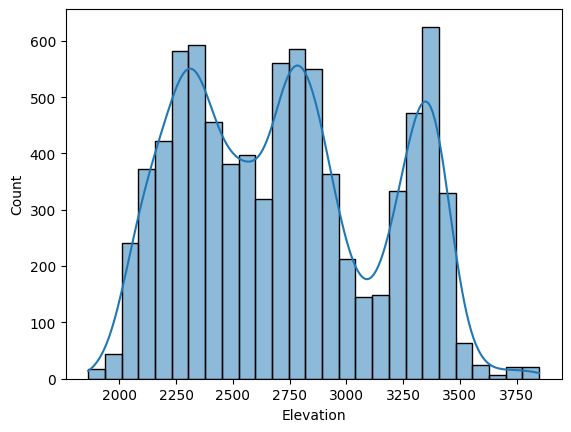

In [ ]:
sns.histplot(data=train_data['Elevation'], kde=True)

<Axes: xlabel='Aspect', ylabel='Count'>

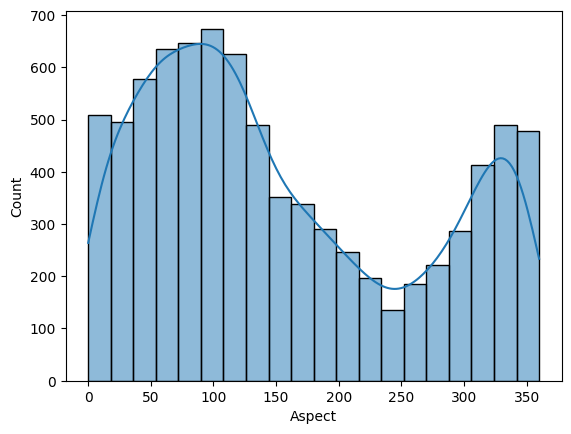

In [ ]:
sns.histplot(data=train_data['Aspect'], kde=True)

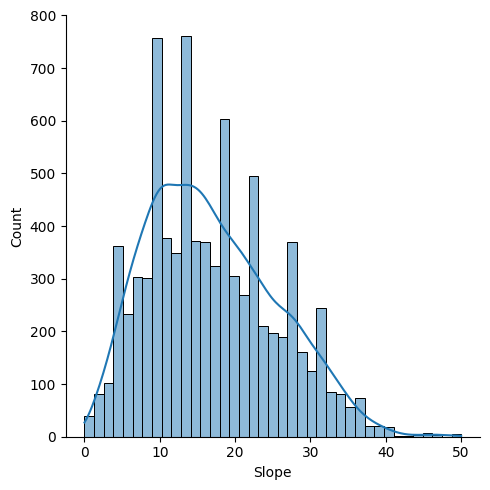

In [ ]:
sns.displot(data=train_data, x='Slope', kind='hist', kde=True)

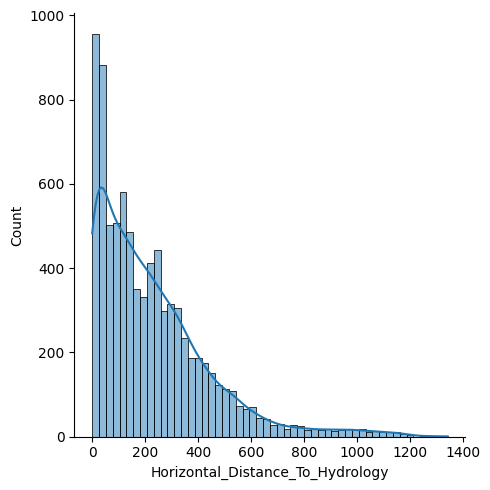

In [ ]:
sns.displot(data=train_data, x='Horizontal_Distance_To_Hydrology', kind='hist', kde=True)

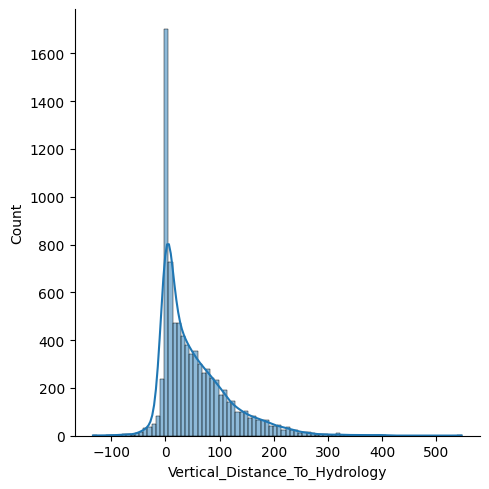

In [ ]:
sns.displot(data=train_data, x='Vertical_Distance_To_Hydrology', kind='hist', kde=True)

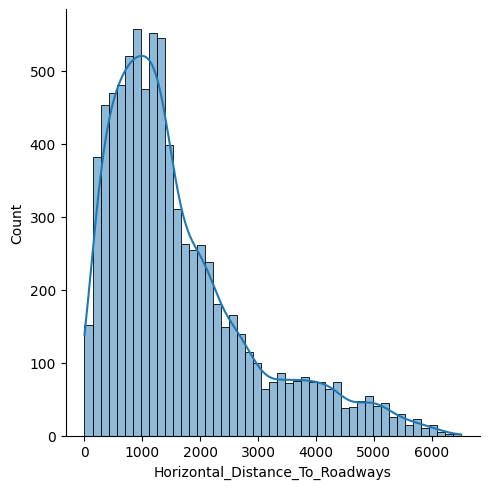

In [ ]:
sns.displot(data=train_data, x='Horizontal_Distance_To_Roadways', kind='hist', kde=True)

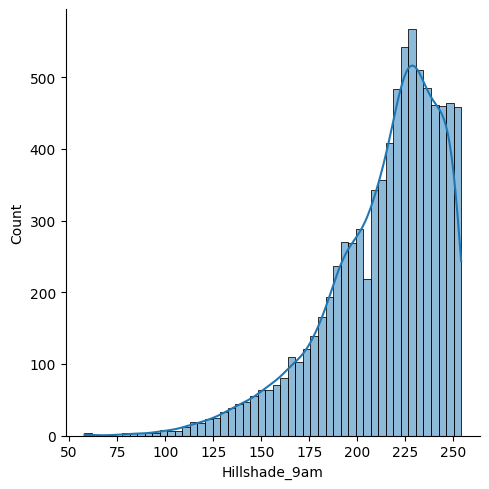

In [ ]:
sns.displot(data=train_data, x='Hillshade_9am', kind='hist', kde=True)

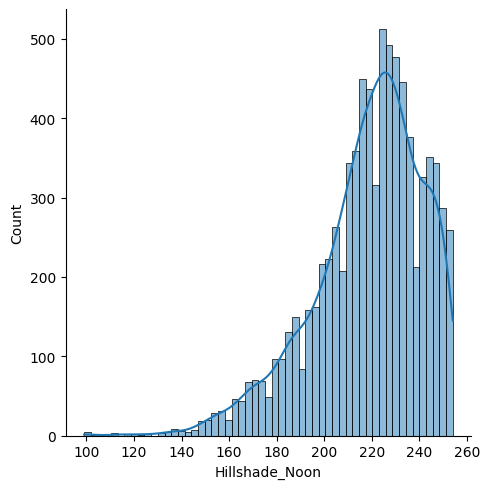

In [ ]:
sns.displot(data=train_data, x='Hillshade_Noon', kind='hist', kde=True)

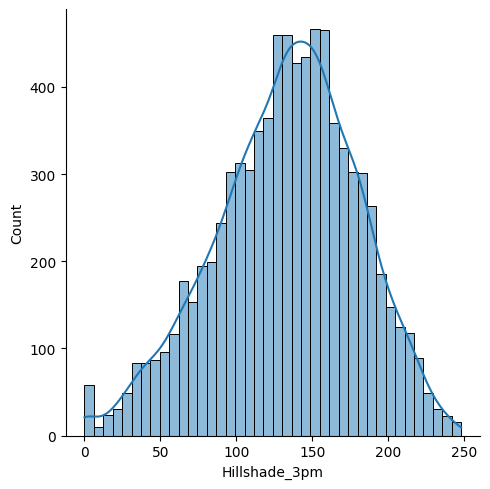

In [ ]:
sns.displot(data=train_data, x='Hillshade_3pm', kind='hist', kde=True)

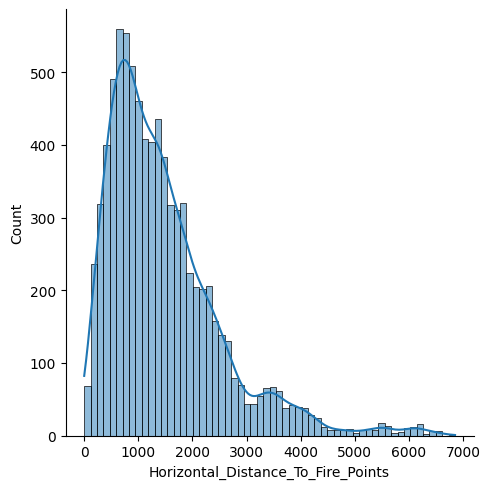

In [ ]:
sns.displot(data=train_data, x='Horizontal_Distance_To_Fire_Points', kind='hist', kde=True)

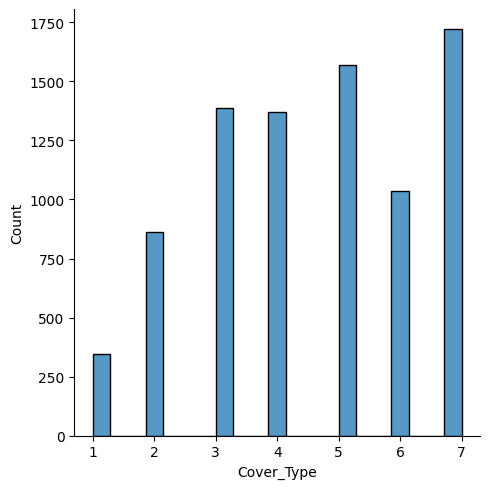

In [ ]:
sns.displot(data=train_data, x='Cover_Type', kind='hist')

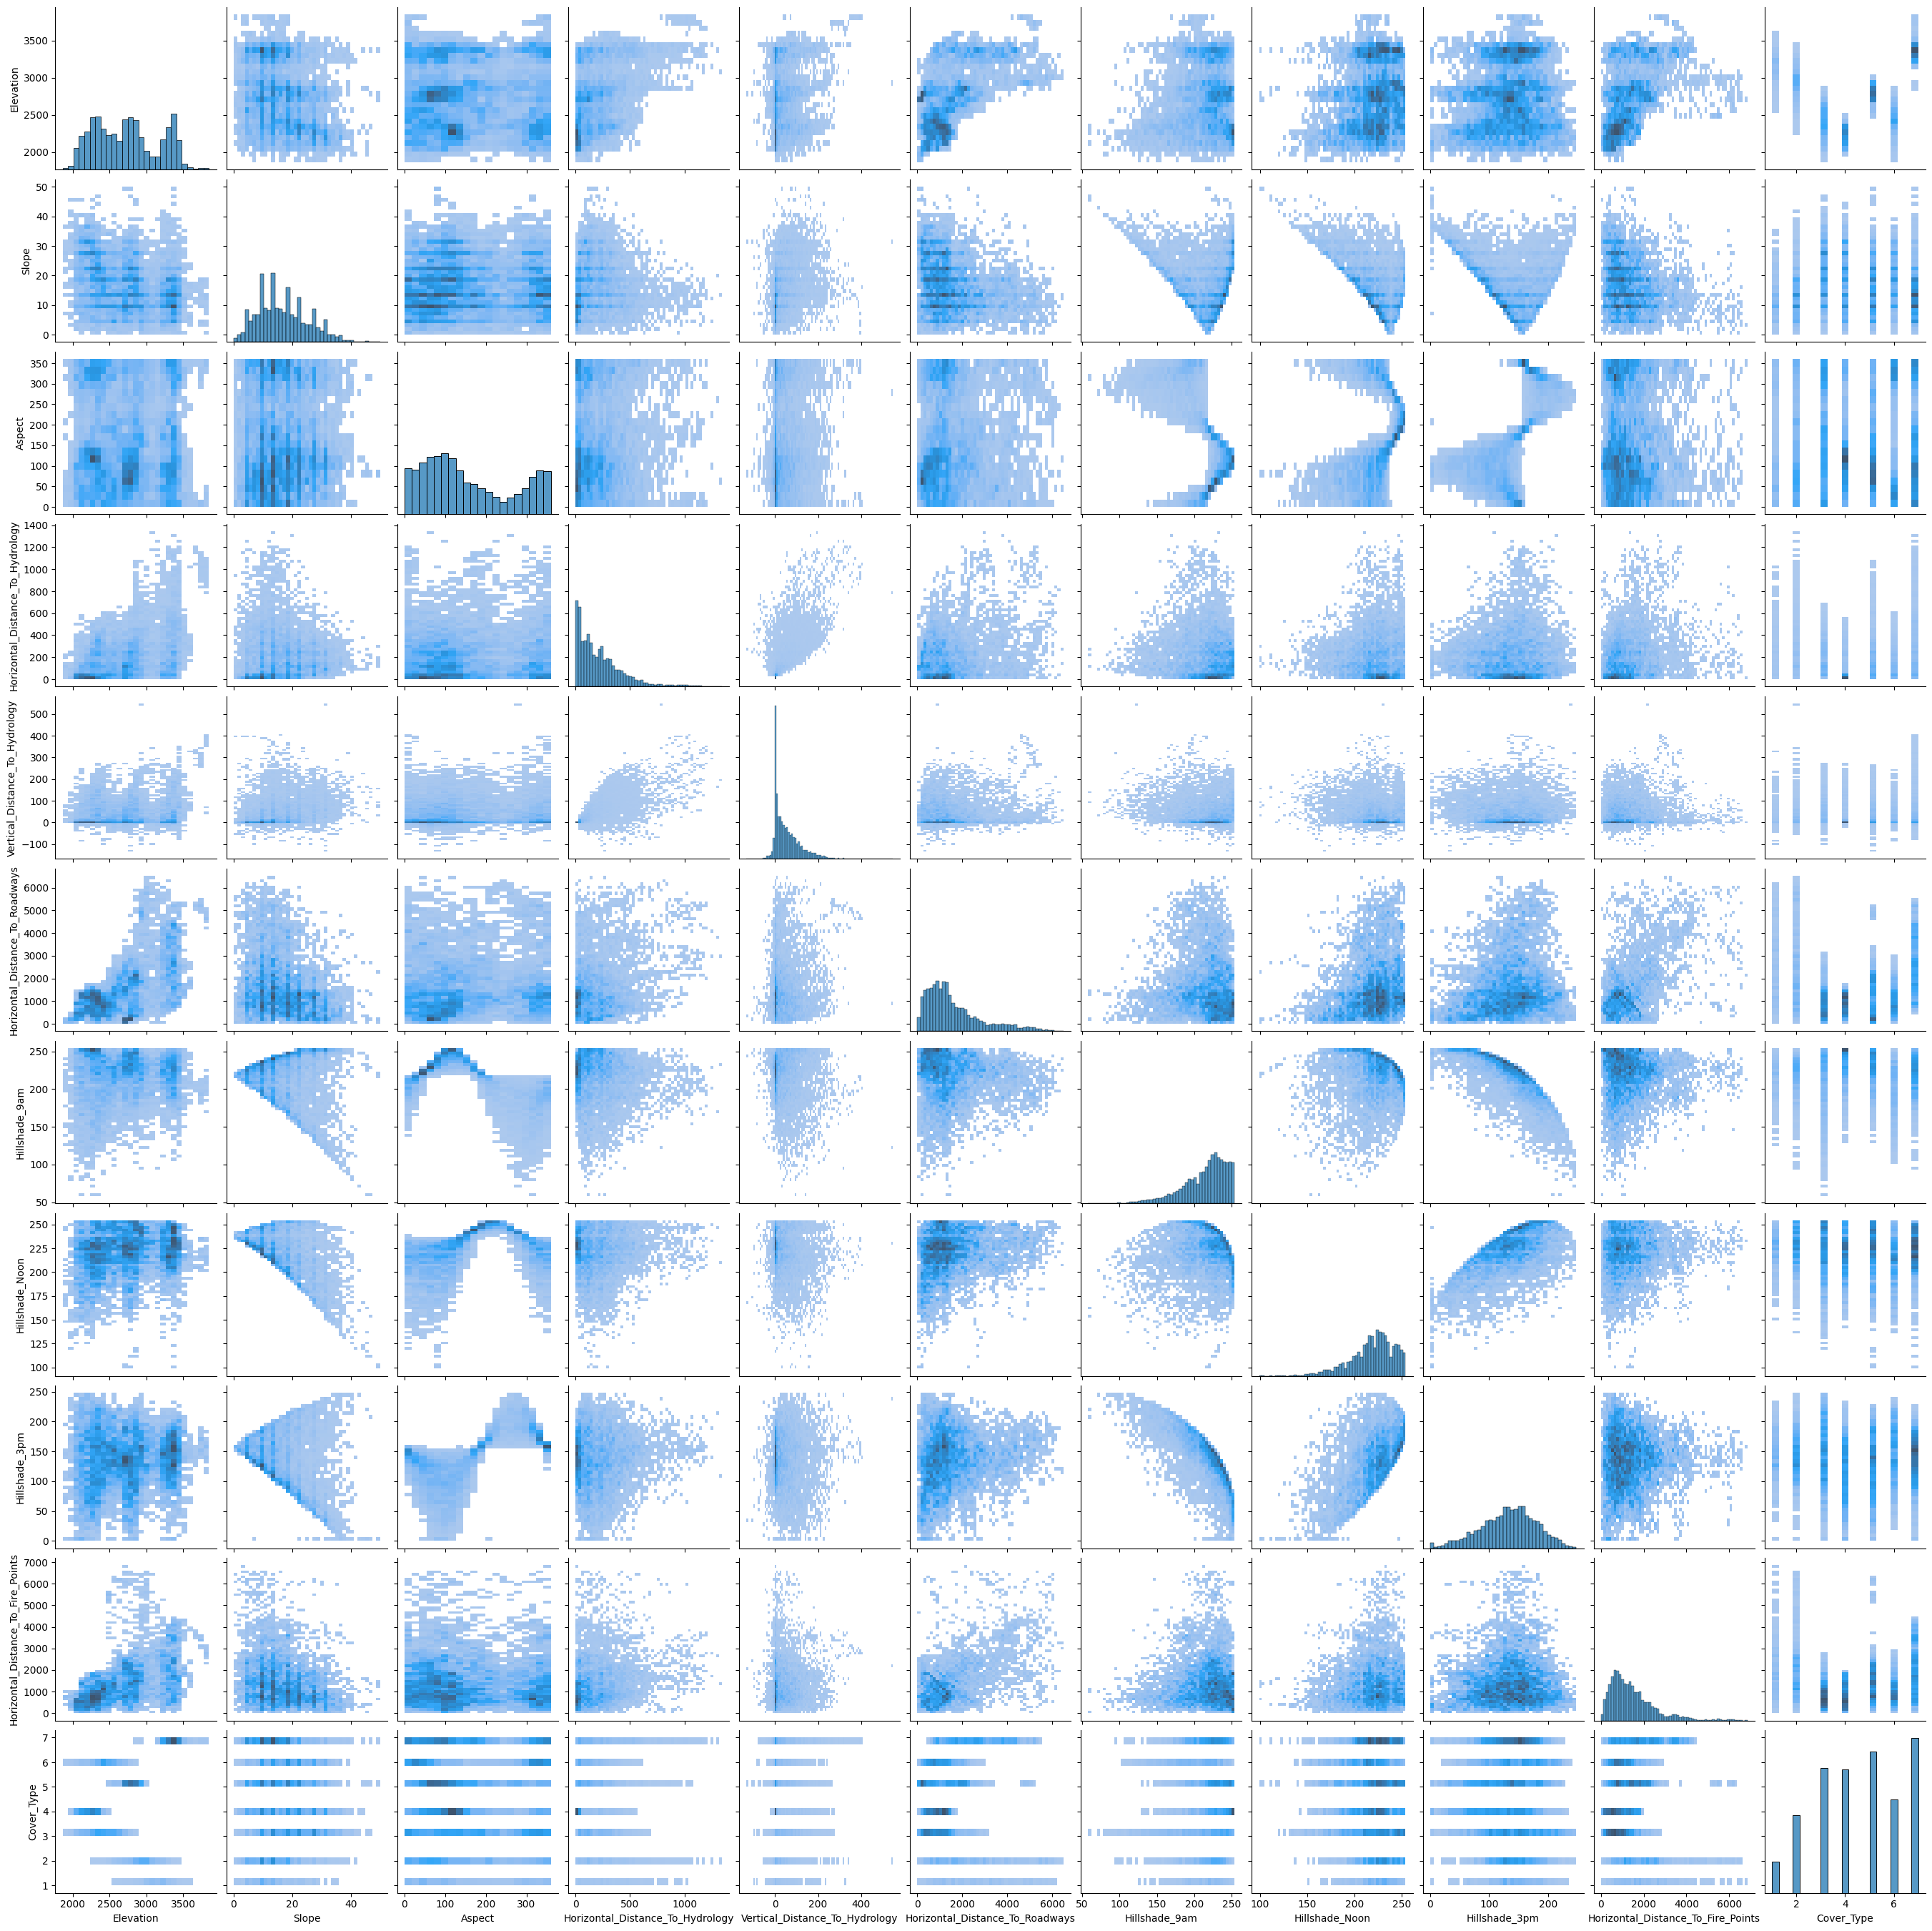

In [ ]:
sns.pairplot(train_data[['Elevation', 'Slope', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type']],
            kind='hist')

In [ ]:
train_data.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,0.227031,0.017052,-0.053912,0.129638,0.064142,0.069688,0.010316,0.093816,0.050579,...,0.039420,0.053030,0.012937,0.062404,0.007393,0.005944,0.113623,0.105886,0.146865,0.158630
Elevation,0.227031,1.000000,-0.017803,-0.295976,0.429594,0.155963,0.609362,0.111997,0.192910,0.065197,...,0.144724,0.114725,0.022467,0.135426,0.047262,0.087618,0.374220,0.338998,0.350907,0.375310
Aspect,0.017052,-0.017803,1.000000,0.012123,0.049678,0.052933,0.081344,-0.591029,0.331620,0.631366,...,-0.017029,0.001342,0.020549,0.000575,0.004654,-0.058436,0.060007,-0.049534,0.025755,-0.001659
Slope,-0.053912,-0.295976,0.012123,1.000000,-0.069284,0.248985,-0.270336,-0.170122,-0.611995,-0.351842,...,-0.137937,0.047177,-0.030191,-0.062557,-0.007846,0.003120,-0.180501,0.043300,-0.063487,-0.045096
Horizontal_Distance_To_Hydrology,0.129638,0.429594,0.049678,-0.069284,1.000000,0.670362,0.229673,-0.031120,0.081577,0.081888,...,0.137310,0.021274,0.081867,-0.011976,0.098499,-0.017412,0.162374,0.066147,0.277713,0.102627
Vertical_Distance_To_Hydrology,0.064142,0.155963,0.052933,0.248985,0.670362,1.000000,0.043495,-0.079477,-0.131788,-0.044997,...,0.027389,0.043076,0.034229,-0.023660,0.015877,-0.032304,-0.023597,0.055403,0.250972,0.065094
Horizontal_Distance_To_Roadways,0.069688,0.609362,0.081344,-0.270336,0.229673,0.043495,1.000000,-0.013395,0.237267,0.179784,...,0.027334,0.070375,0.026863,0.084673,0.040727,0.084178,0.249834,0.148690,0.200389,0.123496
Hillshade_9am,0.010316,0.111997,-0.591029,-0.170122,-0.031120,-0.079477,-0.013395,1.000000,-0.025532,-0.780323,...,0.017216,-0.011804,-0.003032,0.028020,0.013660,0.011199,0.002898,0.043940,-0.034411,0.021400
Hillshade_Noon,0.093816,0.192910,0.331620,-0.611995,0.081577,-0.131788,0.237267,-0.025532,1.000000,0.622086,...,0.075491,-0.002807,0.028089,0.041016,0.034331,-0.045337,0.118934,-0.064234,-0.002622,-0.037844
Hillshade_3pm,0.050579,0.065197,0.631366,-0.351842,0.081888,-0.044997,0.179784,-0.780323,0.622086,1.000000,...,0.046811,0.001906,0.021416,0.008941,0.007819,-0.030191,0.089723,-0.072296,0.039780,-0.023323


<Axes: >

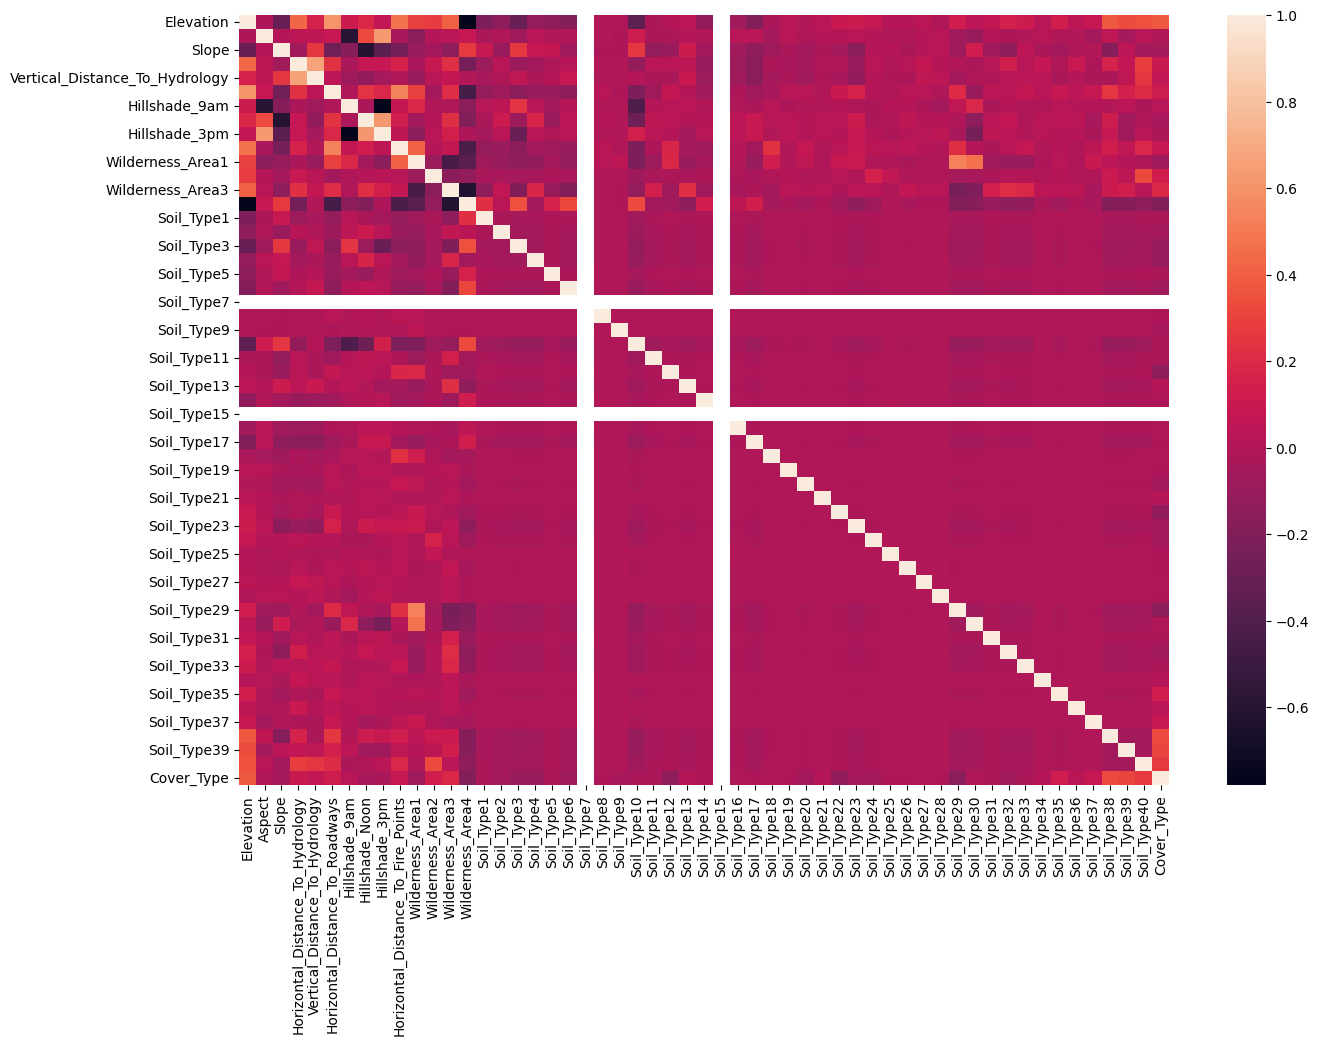

In [ ]:

plt.figure(figsize=(15, 10))
sns.heatmap(train_data.iloc[:,1:].corr())

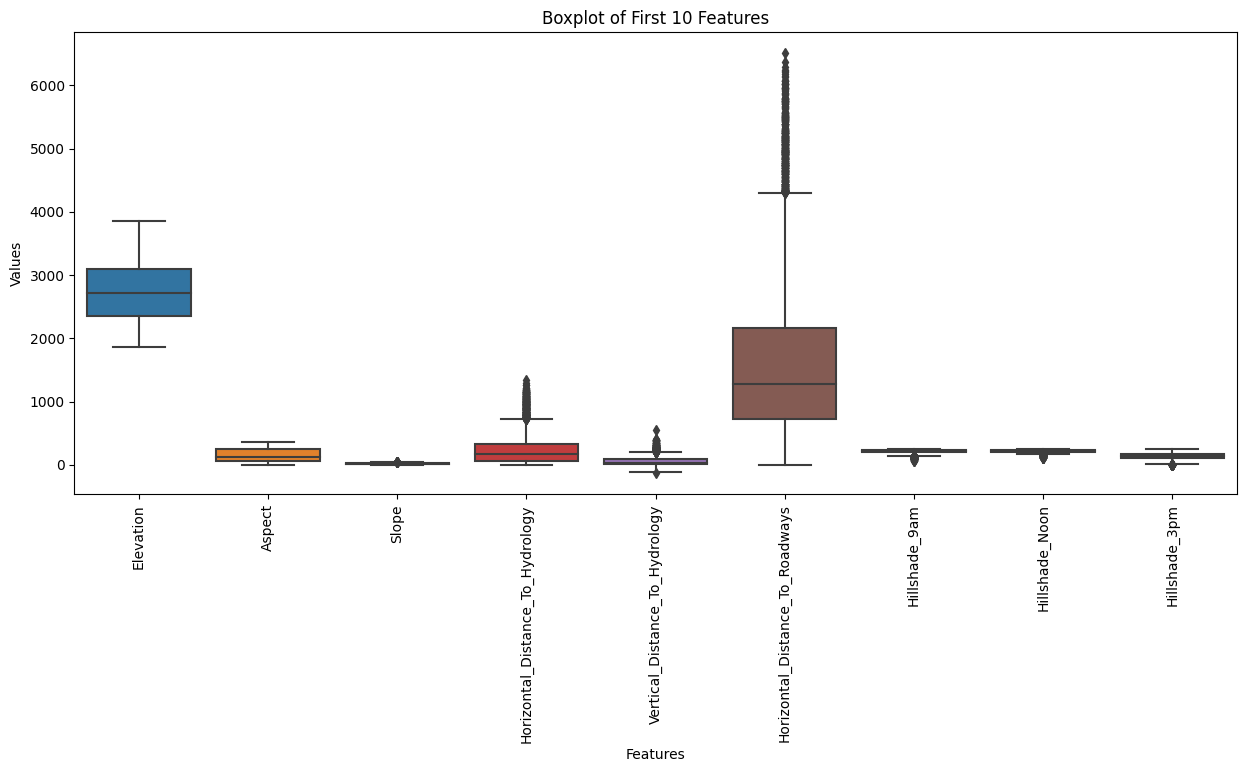

In [ ]:
plt.figure(figsize=(15, 6))  # Set the figure size
sns.boxplot(data = train_data.iloc[:,1:10])

# Add title and labels to the plot
plt.xticks(rotation=90)
plt.title('Boxplot of First 10 Features')
plt.xlabel('Features' )
plt.ylabel('Values')

# Show the plot
plt.show()

## TSNE


In [ ]:
X_train, y_train = train_data.drop(columns= ["Cover_Type", "Id"], axis = 1), train_data["Cover_Type"]
X_test, y_test = test_data.drop(columns= ["Cover_Type", "Id"]), test_data["Cover_Type"]

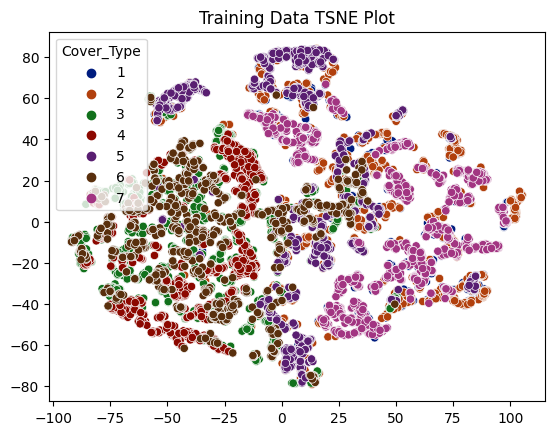

In [ ]:
tsne = TSNE(n_components= 2, random_state = 42)
train_tsne = tsne.fit_transform(X_train)
sns.scatterplot(x=train_tsne[:, 0], y=train_tsne[:, 1], hue=y_train, palette='dark',)
plt.title('Training Data TSNE Plot')

plt.show()

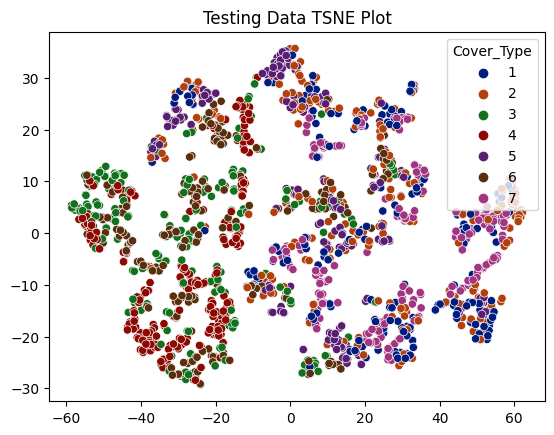

In [ ]:
tsne = TSNE(n_components= 2, random_state = 42)
test_tsne = tsne.fit_transform(X_test)
sns.scatterplot(x=test_tsne[:, 0], y=test_tsne[:, 1], hue=y_test, palette='dark',)
plt.title('Testing Data TSNE Plot')

plt.show()

## Appling Models

In [ ]:
def plot_confusion_matrix(cm, title):
  plt.figure(figsize=(8,6), dpi=100)
  sns.set(font_scale = 1.1)
  ax = sns.heatmap(cm, annot=True, fmt='d', )
  ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
  ax.set_ylabel("Actual Label", fontsize=14, labelpad=20)
  ax.set_title(title, fontsize=14, pad=20)
  plt.show()

In [ ]:
def compare_accuracy(model_names, accuracy_scores, title):
    # Define custom colors for the bars
    colors = ['steelblue', 'limegreen', 'orange', 'tomato', 'Blue']
    plt.figure(figsize=(8,6), dpi=100)
    # Create a bar plot using Seaborn with custom colors
    sns.barplot(x=model_names, y=accuracy_scores, palette=colors)

    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title(title)

    # Display exact percentage values above each bar
    for i, v in enumerate(accuracy_scores):
        plt.text(i, v, f'{v:.3f}%', ha='center', bbox=dict(facecolor='white', edgecolor='black'))

    plt.show()

## Q1


In [ ]:
KNN_model = KNeighborsClassifier()

KNN_model.fit(X_train, y_train)

y_pred = KNN_model.predict(X_test)
KNN_accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy: ", KNN_accuracy)


KNN Accuracy:  0.7383606557377049


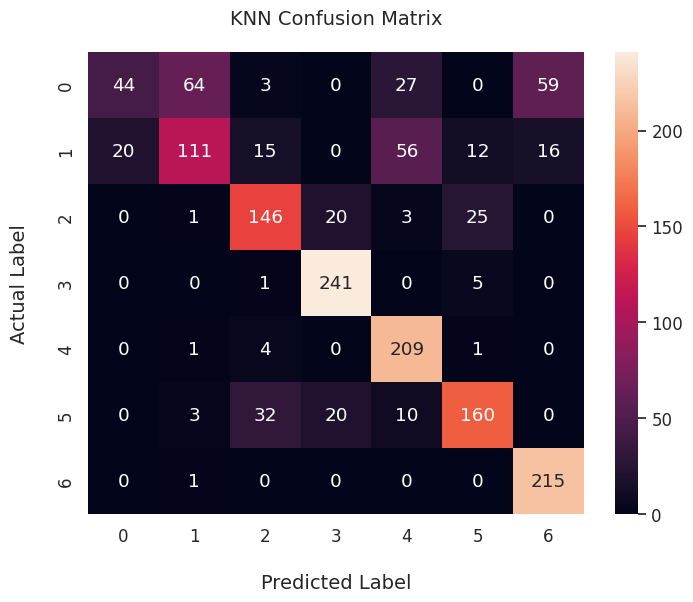

In [ ]:
KNN_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(KNN_cm ,"KNN Confusion Matrix")

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)
LR_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy: ", LR_accuracy)

Logistic Regression Accuracy:  0.4740983606557377


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


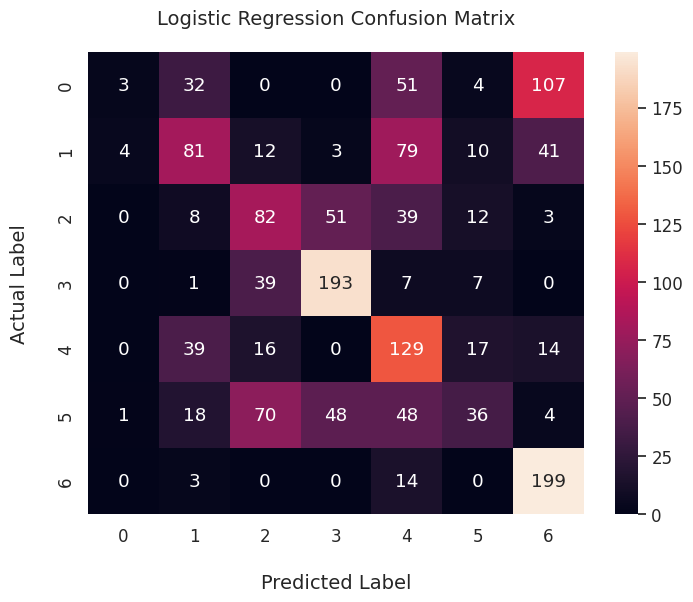

In [ ]:
LR_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(LR_cm ,"Logistic Regression Confusion Matrix")

In [ ]:
SVM_model = SVC()
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)
SVM_accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy: ", SVM_accuracy)

SVM Accuracy:  0.5613114754098361


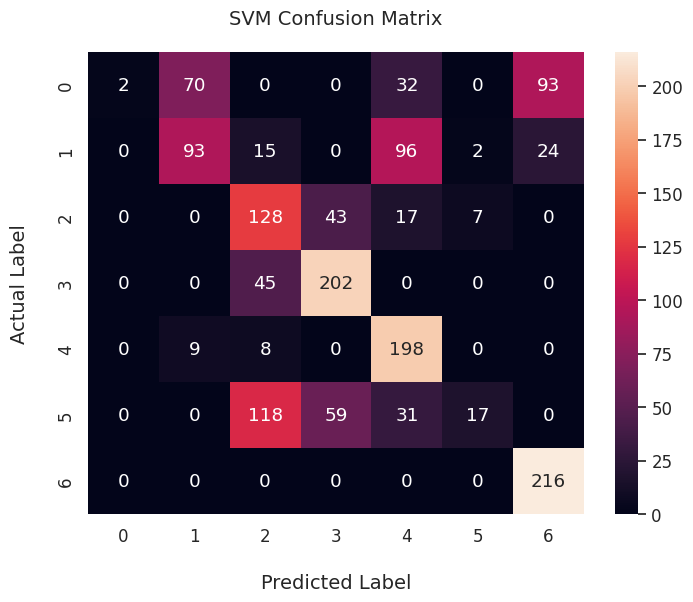

In [ ]:
SVM_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(SVM_cm ,"SVM Confusion Matrix")

In [ ]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
DT_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy: ", DT_accuracy)

Decision Tree Classifier Accuracy:  0.7586885245901639


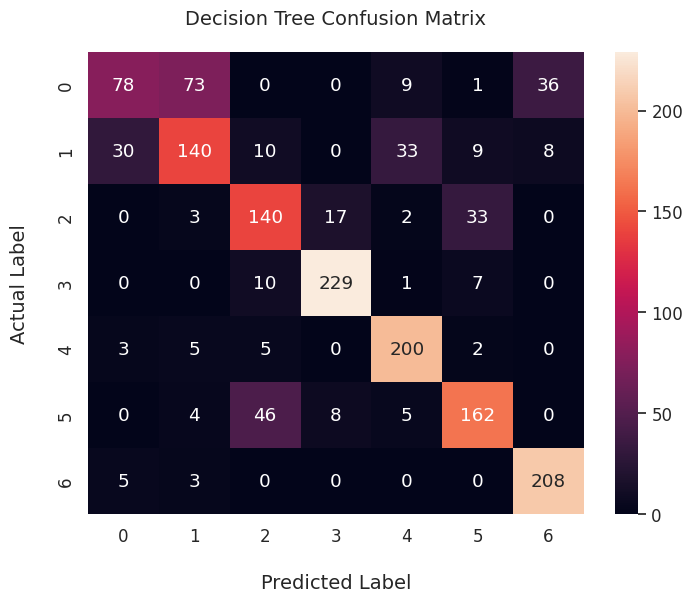

In [ ]:
DT_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(DT_cm ,"Decision Tree Confusion Matrix")

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy: ", gnb_accuracy)

Naive Bayes Accuracy:  0.6013114754098361


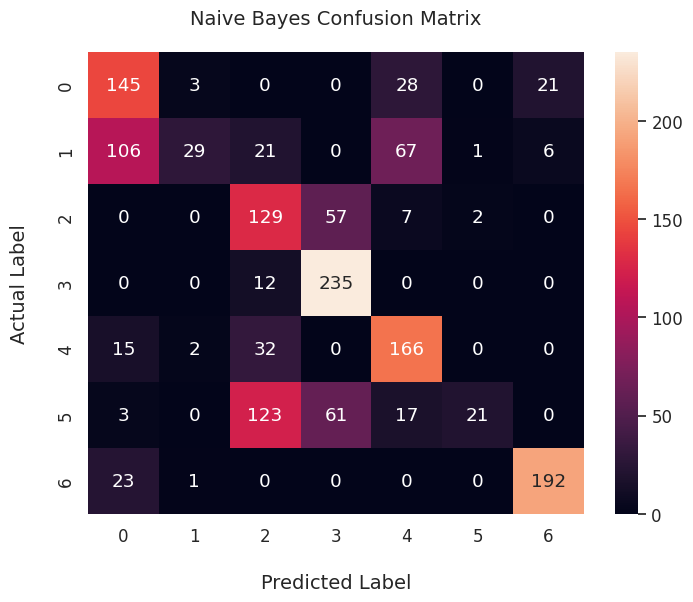

In [ ]:
gnb_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(gnb_cm ,"Naive Bayes Confusion Matrix")

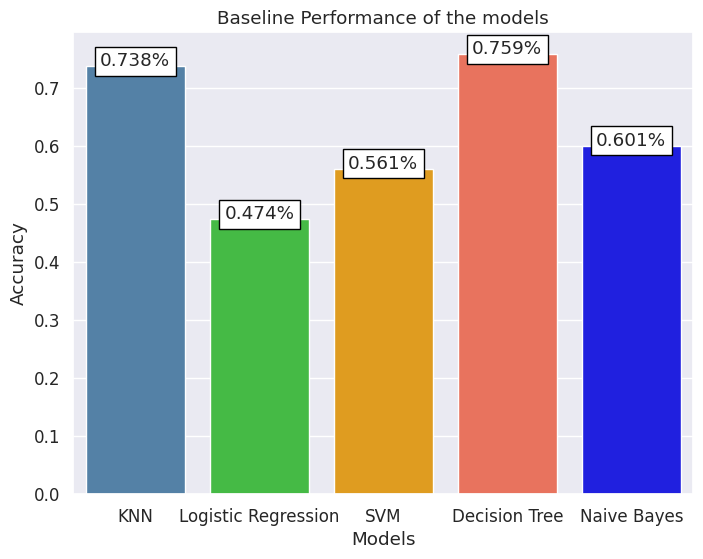

In [ ]:
accuracy_scores = [ KNN_accuracy, LR_accuracy, SVM_accuracy, DT_accuracy, gnb_accuracy]
model_names = ['KNN','Logistic Regression','SVM','Decision Tree','Naive Bayes']
compare_accuracy(model_names, accuracy_scores, 'Baseline Performance of the models')

# Q2

##KNN

In [ ]:
# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Initialize lists to store accuracy results
num_features_list1 = list(range(1, len(X_train.columns)))
accuracy_knn_filtered_list = []

# Feature selection using Filter-based method (SelectKBest with mutual_info_classif)
for num_features1 in num_features_list1:
    selector = SelectKBest(score_func=mutual_info_classif, k=num_features1)
    X_train_filtered = selector.fit_transform(X_train, y_train)
    X_test_filtered = selector.transform(X_test)

    # Train and evaluate KNN model on filtered feature set
    knn_model.fit(X_train_filtered, y_train)
    y_pred_knn = knn_model.predict(X_test_filtered)
    accuracy_knn_filtered = accuracy_score(y_test, y_pred_knn)
    accuracy_knn_filtered_list.append(accuracy_knn_filtered*100)

    # Print k and accuracy for each iteration
    print(f"K = {num_features1}, Accuracy = {accuracy_knn_filtered:.4f}")

# Find the best number of features for the filter-based method
best_num_features_knn_filtered = num_features_list1[np.argmax(accuracy_knn_filtered_list)]

print(f"Best number of features for KNN (Filter) = {best_num_features_knn_filtered} With Accuracy = {accuracy_knn_filtered:.4f}/100 ")

K = 1, Accuracy = 0.5062
K = 2, Accuracy = 0.5075
K = 3, Accuracy = 0.5856
K = 4, Accuracy = 0.6800
K = 5, Accuracy = 0.6800
K = 6, Accuracy = 0.6800
K = 7, Accuracy = 0.6800
K = 8, Accuracy = 0.6800
K = 9, Accuracy = 0.7023
K = 10, Accuracy = 0.6800
K = 11, Accuracy = 0.7023
K = 12, Accuracy = 0.7003
K = 13, Accuracy = 0.7246
K = 14, Accuracy = 0.7246
K = 15, Accuracy = 0.7370
K = 16, Accuracy = 0.7370
K = 17, Accuracy = 0.7370
K = 18, Accuracy = 0.7370
K = 19, Accuracy = 0.7370
K = 20, Accuracy = 0.7390
K = 21, Accuracy = 0.7351
K = 22, Accuracy = 0.7370
K = 23, Accuracy = 0.7351
K = 24, Accuracy = 0.7351
K = 25, Accuracy = 0.7390
K = 26, Accuracy = 0.7384
K = 27, Accuracy = 0.7357
K = 28, Accuracy = 0.7384
K = 29, Accuracy = 0.7357
K = 30, Accuracy = 0.7357
K = 31, Accuracy = 0.7384
K = 32, Accuracy = 0.7384
K = 33, Accuracy = 0.7384
K = 34, Accuracy = 0.7384
K = 35, Accuracy = 0.7384
K = 36, Accuracy = 0.7384
K = 37, Accuracy = 0.7384
K = 38, Accuracy = 0.7384
K = 39, Accuracy = 0.

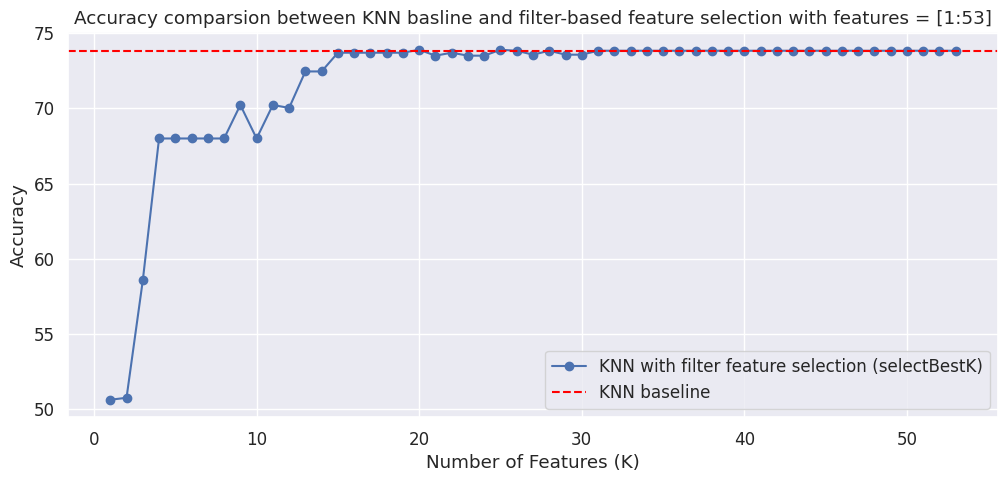

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(num_features_list1, accuracy_knn_filtered_list, marker='o',label = 'KNN with filter feature selection (selectBestK)')
plt.axhline(y= KNN_accuracy*100, color='red', linestyle='--', label='KNN baseline')
plt.xlabel('Number of Features (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy comparsion between KNN basline and filter-based feature selection with features = [1:53]')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Initialize empty lists to store results
knn_fs_train = []
knn_fs_test = []
knn_fs_acc = []
n_feature_wrapper = list(range(1, 54))

# Initialize variable to store the selected features from the previous iteration
prev_selected_indices = None

# Variables to track the best accuracy and corresponding features
best_accuracy = 0.0
best_selected_features = []

# Loop through the feature range
for n in n_feature_wrapper:
    feature_names = X_train.columns
    knn_wrapper = KNeighborsClassifier()

    # If there are selected features from the previous iteration, use them as fixed features
    if prev_selected_indices is not None:
        k_features_range = range(len(prev_selected_indices), len(feature_names) + 1)
        knn_fs = SequentialFeatureSelector(knn_wrapper, k_features=n, forward=True, fixed_features=prev_selected_indices)
    else:
        k_features_range = range(1, len(feature_names) + 1)
        knn_fs = SequentialFeatureSelector(knn_wrapper, k_features=n, forward=True)

    knn_fs.fit(X_train, y_train)

    selected_indices = knn_fs.k_feature_idx_
    selected_feature_names = [feature_names[idx] for idx in selected_indices]

    X_train_selected = knn_fs.transform(X_train)
    X_test_selected = knn_fs.transform(X_test)
    knn_fs_train.append(X_train_selected)
    knn_fs_test.append(X_test_selected)

    # Store the selected features for the next iteration
    prev_selected_indices = selected_indices

    # Train the KNN classifier on the selected features
    knn_wrapper.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = knn_wrapper.predict(X_test_selected)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    knn_fs_acc.append(acc * 100)

    print(f"Forward feature elimination with n features = {n}: Accuracy = {acc}")
    print("Selected feature names:", selected_feature_names)

    # Check if the current accuracy is the best so far
    if acc > best_accuracy:
        best_accuracy = acc
        best_selected_features = selected_feature_names

# Print the best accuracy and corresponding features
print(f"Best Accuracy: {best_accuracy}")
print("Best Selected Feature names:", best_selected_features)

Forward feature elimination with n features = 1: Accuracy = 0.5062295081967213
Selected feature names: ['Elevation']
Forward feature elimination with n features = 2: Accuracy = 0.5927868852459016
Selected feature names: ['Elevation', 'Vertical_Distance_To_Hydrology']
Forward feature elimination with n features = 3: Accuracy = 0.6681967213114755
Selected feature names: ['Elevation', 'Aspect', 'Vertical_Distance_To_Hydrology']
Forward feature elimination with n features = 4: Accuracy = 0.699672131147541
Selected feature names: ['Elevation', 'Aspect', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']
Forward feature elimination with n features = 5: Accuracy = 0.7081967213114754
Selected feature names: ['Elevation', 'Aspect', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
Forward feature elimination with n features = 6: Accuracy = 0.7265573770491803
Selected feature names: ['Elevation', 'Aspect', 'Horizontal_Dis

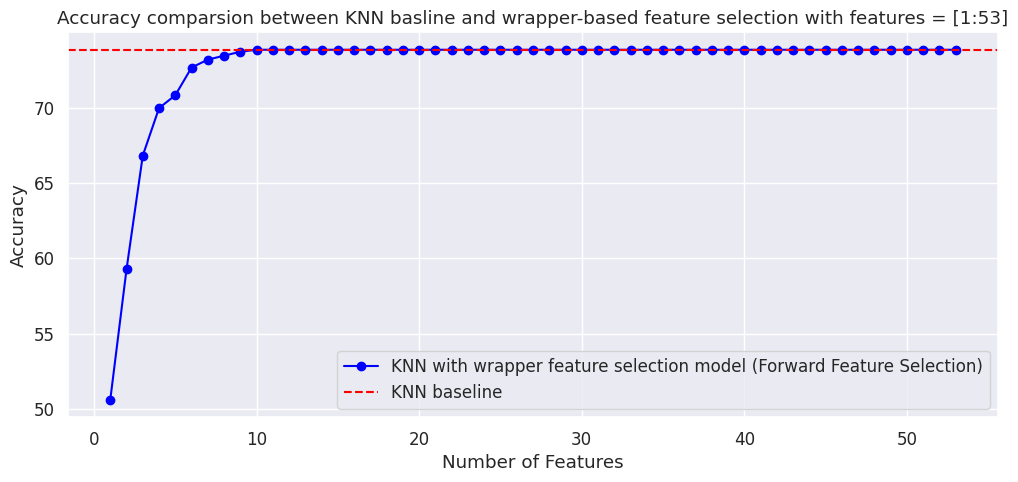

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(n_feature_wrapper, knn_fs_acc, color='blue', linestyle='-', marker='o', label='KNN with wrapper feature selection model (Forward Feature Selection)')
plt.axhline(y=KNN_accuracy*100, color='red', linestyle='--', label='KNN baseline')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy comparsion between KNN basline and wrapper-based feature selection with features = [1:53]')
plt.legend()
plt.grid(True)
plt.show()


## Decision Tree

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier

best_accuracy = 0.0
best_feature_count = 0
best_selected_features = []
num_features_list = []
accuracy_scores = []

dt_model = DecisionTreeClassifier()

# Initialize lists to store accuracy results
num_features_list = list(range(1, len(X_train.columns)))
accuracy_dt_filtered_list = []

# Feature selection using Filter-based method (SelectKBest with mutual_info_classif)
for num_features in num_features_list:
    selector = SelectKBest(score_func=mutual_info_classif, k=num_features)
    X_train_filtered = selector.fit_transform(X_train, y_train)
    X_test_filtered = selector.transform(X_test)

    # Train and evaluate Decision Tree model on filtered feature set
    dt_model.fit(X_train_filtered, y_train)
    y_pred_dt = dt_model.predict(X_test_filtered)
    accuracy_dt_filtered = accuracy_score(y_test, y_pred_dt)
    accuracy_dt_filtered_list.append(accuracy_dt_filtered * 100)

    # Print k and accuracy for each iteration
    print(f"K = {num_features}, Accuracy = {accuracy_dt_filtered:.4f}")

    if accuracy_dt_filtered > best_accuracy:
        best_accuracy = accuracy_dt_filtered
        best_feature_count = num_features

# Find the best number of features for the filter-based method
best_num_features_dt_filtered = num_features_list[np.argmax(accuracy_dt_filtered_list)]
best_accuracy_dt_filtered = accuracy_dt_filtered_list[np.argmax(accuracy_dt_filtered_list)]

print(f"Best number of features for Decision Tree (Filter) = {best_num_features_dt_filtered} With Accuracy = {best_accuracy_dt_filtered:.4f}")


K = 1, Accuracy = 0.5193
K = 2, Accuracy = 0.5207
K = 3, Accuracy = 0.5580
K = 4, Accuracy = 0.5836
K = 5, Accuracy = 0.6754
K = 6, Accuracy = 0.6669
K = 7, Accuracy = 0.7161
K = 8, Accuracy = 0.7193
K = 9, Accuracy = 0.7128
K = 10, Accuracy = 0.7193
K = 11, Accuracy = 0.7325
K = 12, Accuracy = 0.7692
K = 13, Accuracy = 0.7633
K = 14, Accuracy = 0.7626
K = 15, Accuracy = 0.7430
K = 16, Accuracy = 0.7515
K = 17, Accuracy = 0.7587
K = 18, Accuracy = 0.7607
K = 19, Accuracy = 0.7495
K = 20, Accuracy = 0.7593
K = 21, Accuracy = 0.7462
K = 22, Accuracy = 0.7482
K = 23, Accuracy = 0.7462
K = 24, Accuracy = 0.7554
K = 25, Accuracy = 0.7410
K = 26, Accuracy = 0.7554
K = 27, Accuracy = 0.7626
K = 28, Accuracy = 0.7666
K = 29, Accuracy = 0.7495
K = 30, Accuracy = 0.7548
K = 31, Accuracy = 0.7416
K = 32, Accuracy = 0.7534
K = 33, Accuracy = 0.7528
K = 34, Accuracy = 0.7613
K = 35, Accuracy = 0.7475
K = 36, Accuracy = 0.7574
K = 37, Accuracy = 0.7685
K = 38, Accuracy = 0.7548
K = 39, Accuracy = 0.

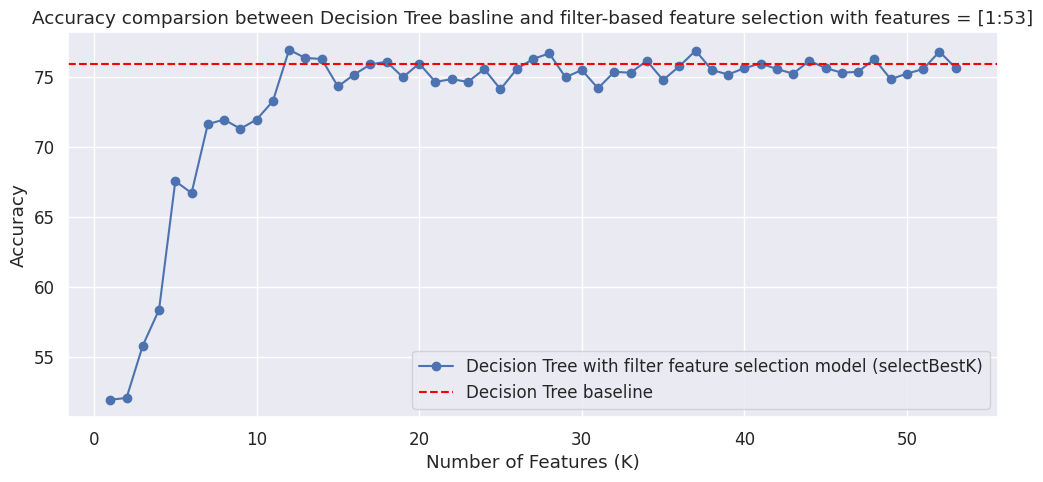

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(num_features_list, accuracy_dt_filtered_list, marker='o',label = 'Decision Tree with filter feature selection model (selectBestK)')
plt.axhline(y=DT_accuracy*100, color='red', linestyle='--', label='Decision Tree baseline')
plt.xlabel('Number of Features (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy comparsion between Decision Tree basline and filter-based feature selection with features = [1:53]')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Initialize empty lists to store results
dt_fs_train = []
dt_fs_test = []
dt_fs_acc = []

# Initialize variable to store the selected features from the previous iteration
prev_selected_indices = None

# Loop through the feature range
for n in n_feature_wrapper:
    feature_names = X_train.columns
    dt_wrapper = DecisionTreeClassifier()

    # If there are selected features from the previous iteration, use them as fixed features
    if prev_selected_indices is not None:
        k_features_range = range(len(prev_selected_indices), len(feature_names) + 1)
        dt_fs = SequentialFeatureSelector(dt_wrapper, k_features=n, forward=True, fixed_features=prev_selected_indices)
    else:
        k_features_range = range(1, len(feature_names) + 1)
        dt_fs = SequentialFeatureSelector(dt_wrapper, k_features=n, forward=True)

    dt_fs.fit(X_train, y_train)

    selected_indices = dt_fs.k_feature_idx_
    selected_feature_names = [feature_names[idx] for idx in selected_indices]

    X_train_selected = dt_fs.transform(X_train)
    X_test_selected = dt_fs.transform(X_test)
    dt_fs_train.append(X_train_selected)
    dt_fs_test.append(X_test_selected)

    # Store the selected features for the next iteration
    prev_selected_indices = selected_indices

    # Train the dt classifier on the selected features
    dt_wrapper.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = dt_wrapper.predict(X_test_selected)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    dt_fs_acc.append(acc * 100)

    print(f"Forward feature elimination with n features = {n}: Accuracy = {acc}")
    print("Selected feature names:", selected_feature_names)

Forward feature elimination with n features = 1: Accuracy = 0.519344262295082
Selected feature names: ['Elevation']
Forward feature elimination with n features = 2: Accuracy = 0.5619672131147541
Selected feature names: ['Elevation', 'Horizontal_Distance_To_Roadways']
Forward feature elimination with n features = 3: Accuracy = 0.6465573770491804
Selected feature names: ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
Forward feature elimination with n features = 4: Accuracy = 0.6990163934426229
Selected feature names: ['Elevation', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
Forward feature elimination with n features = 5: Accuracy = 0.7396721311475409
Selected feature names: ['Elevation', 'Aspect', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
Forward feature elimination with n features = 6: Accuracy = 0.7521311475409836
Selec

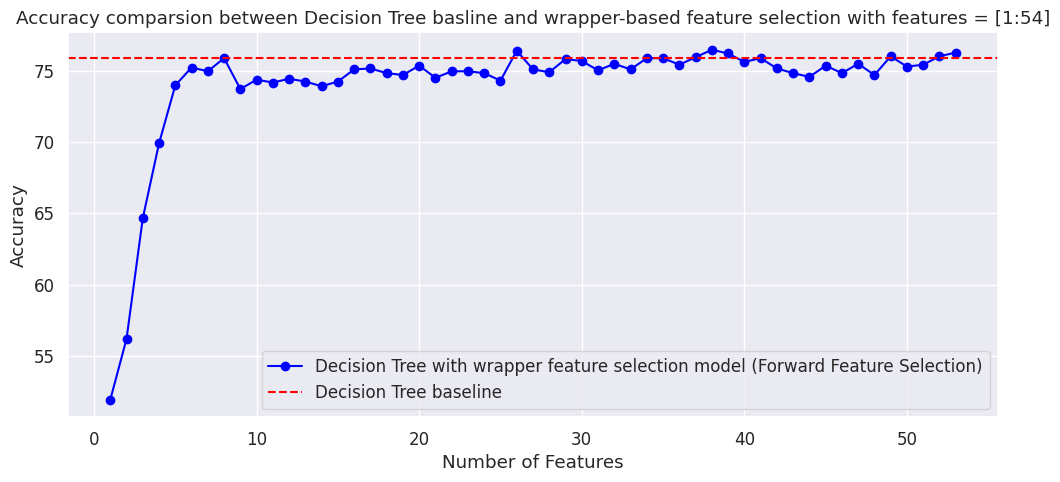

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(n_feature_wrapper, dt_fs_acc, color='blue', linestyle='-', marker='o', label='Decision Tree with wrapper feature selection model (Forward Feature Selection)')
plt.axhline(y=DT_accuracy*100, color='red', linestyle='--', label='Decision Tree baseline')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy comparsion between Decision Tree basline and wrapper-based feature selection with features = [1:54]')
plt.legend()
plt.grid(True)
plt.show()


## PCA

In [ ]:
knn_accuracy_pca_list= []
for n_component in range (1,53):
  pca = PCA(n_components= n_component)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)

  knn_model = KNeighborsClassifier(n_neighbors = 4)
  knn_model.fit(X_train_pca, y_train)
  y_pred_knn_pca = knn_model.predict(X_test_pca)
  knn_accuracy_pca = accuracy_score(y_test, y_pred_knn_pca)
  knn_accuracy_pca_list.append(knn_accuracy_pca*100)

best_n_components = np.argmax(knn_accuracy_pca_list) +1

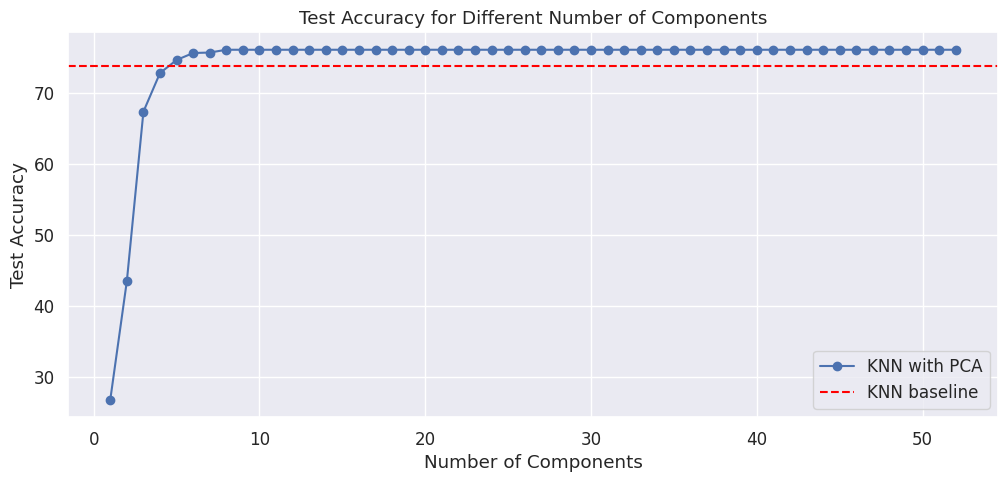

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_components_values = np.arange(1, 53)

plt.figure(figsize=(12, 5))
plt.plot(n_components_values, knn_accuracy_pca_list, marker='o', label='KNN with PCA')
plt.axhline(y=KNN_accuracy * 100, color='red', linestyle='--', label='KNN baseline')
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Number of Components')
plt.xticks(np.arange(0, 53, 10))  # Set x-axis ticks at intervals of 10
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Dt_accuracy_pca_list= []
for n_component in range (1,53):
  pca = PCA(n_components= n_component)
  X_train_pca_dt = pca.fit_transform(X_train)
  X_test_pca_dt = pca.transform(X_test)

  Dt_model = DecisionTreeClassifier()
  Dt_model.fit(X_train_pca_dt, y_train)
  y_pred_Dt_pca = Dt_model.predict(X_test_pca_dt)
  Dt_accuracy_pca = accuracy_score(y_test, y_pred_Dt_pca)
  Dt_accuracy_pca_list.append(Dt_accuracy_pca*100)

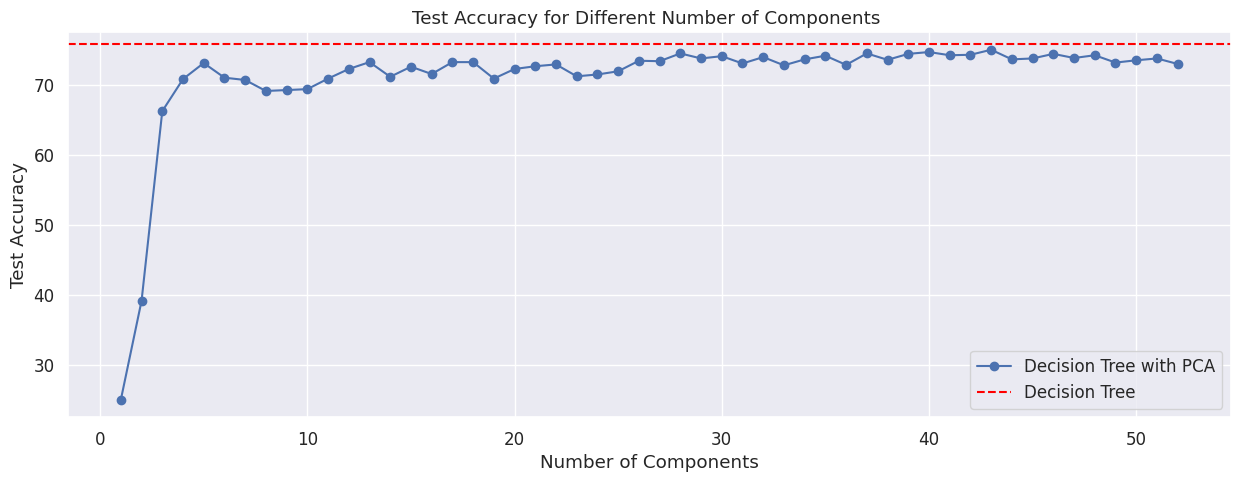

In [ ]:
best_n_components = np.argmax(Dt_accuracy_pca_list) +1
n_components_values = np.arange(1,53)
plt.figure(figsize=(15,5))
plt.plot(n_components_values, Dt_accuracy_pca_list, marker='o',label = 'Decision Tree with PCA')
plt.axhline(y=DT_accuracy*100, color='red', linestyle='--', label='Decision Tree')
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Number of Components ')
plt.xticks(np.arange(0, 53, 10))  # Set x-axis ticks at intervals of 10
plt.grid(True)
plt.legend()
plt.show()

## Best Model

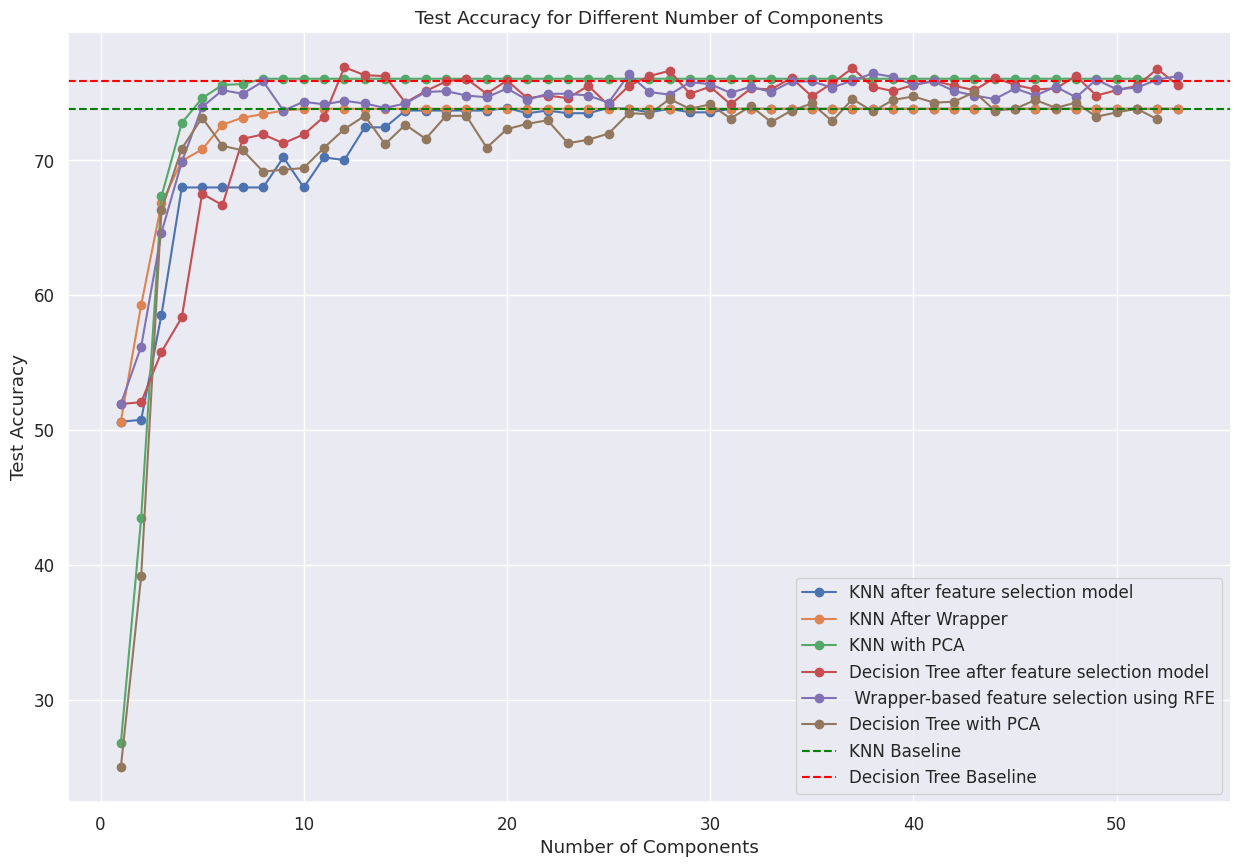

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(n_feature_wrapper, accuracy_knn_filtered_list, marker='o',label = 'KNN after feature selection model')
plt.plot(n_feature_wrapper, knn_fs_acc, marker='o', label='KNN After Wrapper')
plt.plot(n_components_values, knn_accuracy_pca_list, marker='o',label = 'KNN with PCA')
plt.plot(num_features_list, accuracy_dt_filtered_list, marker='o',label = 'Decision Tree after feature selection model')
plt.plot(n_feature_wrapper, dt_fs_acc, marker='o', label=' Wrapper-based feature selection using RFE')
plt.plot(n_components_values, Dt_accuracy_pca_list, marker='o',label = 'Decision Tree with PCA')

plt.axhline(y= KNN_accuracy*100, color='green', linestyle='--', label='KNN Baseline')
plt.axhline(y=DT_accuracy*100, color='red', linestyle='--', label='Decision Tree Baseline')
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Number of Components')
plt.xticks(np.arange(0, 53, 10))
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
dt_model = DecisionTreeClassifier()

# SelectKBest with k=12
selector = SelectKBest(score_func=mutual_info_classif, k=12)
X_train_filtered = selector.fit_transform(X_train, y_train)
X_test_filtered = selector.transform(X_test)

# Train and evaluate Decision Tree model on filtered feature set
dt_model.fit(X_train_filtered, y_train)
y_pred_dt_best = dt_model.predict(X_test_filtered)
accuracy_dt_filtered_best = accuracy_score(y_test, y_pred_dt) * 100

print(f"Best number of features for Decision Tree (Filter) = 12 With Accuracy = {accuracy_dt_filtered:.4f}")


Best number of features for Decision Tree (Filter) = 12 With Accuracy = 0.7561


# Q3

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

y_pred_RF = RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print(" Random Forest Accuracy : ", RF_accuracy )

 Random Forest Accuracy :  0.8104918032786885


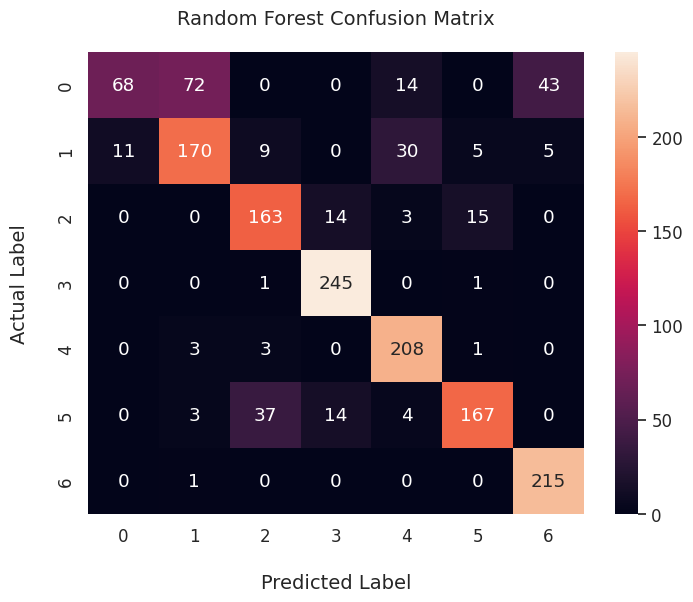

In [ ]:
RF_cm = confusion_matrix(y_test, y_pred_RF)
plot_confusion_matrix(RF_cm ,"Random Forest Confusion Matrix")

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
gb_acc

0.7685245901639344

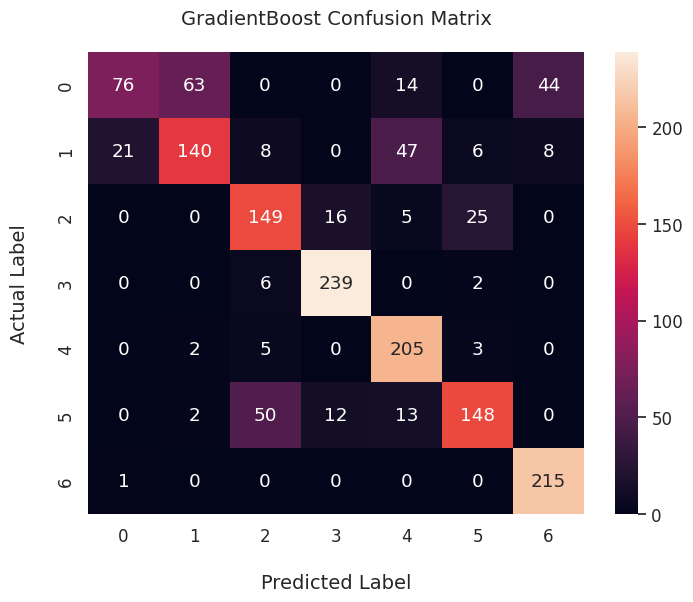

In [ ]:
gb_cm = confusion_matrix(y_test, gb_pred)
plot_confusion_matrix(gb_cm ,"GradientBoost Confusion Matrix")

In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the target classes to integer values starting from 0
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now you can use the XGBClassifier with the transformed target classes
xg = XGBClassifier()
xg.fit(X_train, y_train_encoded)

# Make predictions and calculate accuracy
xg_pred = xg.predict(X_test)
xg_acc = accuracy_score(y_test_encoded, xg_pred)
xg_acc

0.8183606557377049

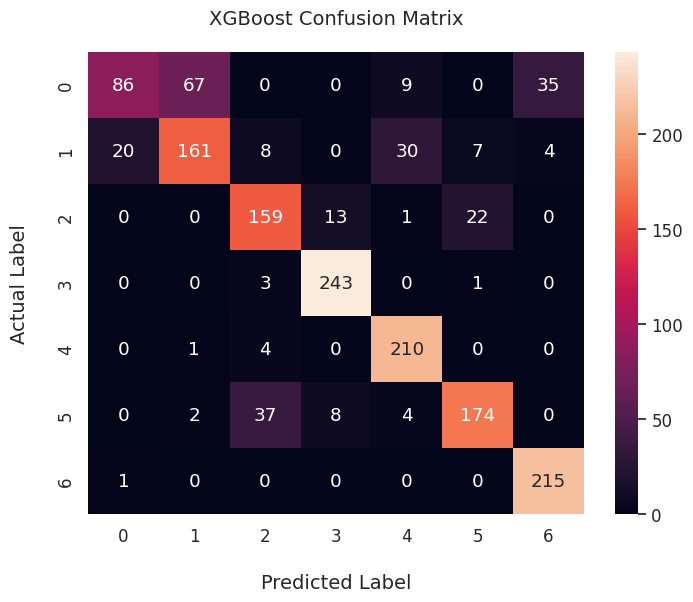

In [ ]:
xg_cm = confusion_matrix(y_test_encoded, xg_pred)
plot_confusion_matrix(xg_cm ,"XGBoost Confusion Matrix")

### As shown in the Accuracy Results and Confussion Matrix we have the best Performance Using XGBoost

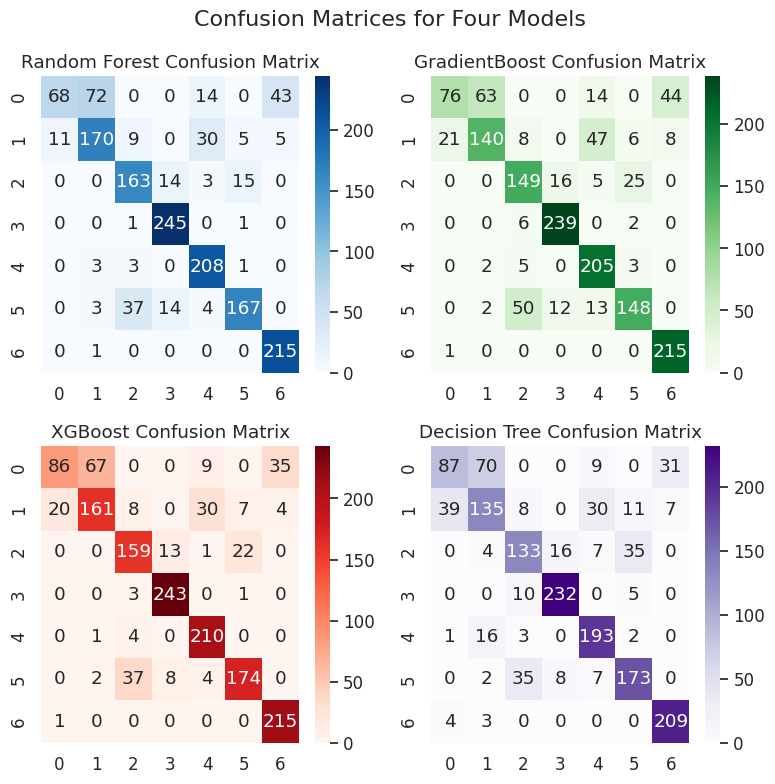

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have your predicted labels and true labels for each model

# List of model names
model_names = ['Random Forest', 'GradientBoost', 'XGBoost', 'Decision Tree']

# List of predicted labels for each model (rf_pred, gb_pred, xg_pred, dt_ig_pred_best)

# List of true labels (y_test, y_test, y_test_encoded, y_test)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Define the colors for each confusion matrix
colors = ['Blues', 'Greens', 'Reds', 'Purples']

# Create a list to store the confusion matrices
confusion_matrices = [confusion_matrix(y_test, y_pred_RF),
                      confusion_matrix(y_test, gb_pred),
                      confusion_matrix(y_test_encoded, xg_pred),
                      confusion_matrix(y_test, y_pred_dt_best)]

# Iterate over each model and its corresponding confusion matrix, and plot them in the subplots
for i, (model_name, cm, color) in enumerate(zip(model_names, confusion_matrices, colors)):
    # Create a heatmap of the confusion matrix using seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, cbar=True, ax=axes[i // 2, i % 2])
    # Set the title for each subplot
    axes[i // 2, i % 2].set_title(f'{model_name} Confusion Matrix')

# Add a title for the entire plot
plt.suptitle('Confusion Matrices for Four Models', fontsize=16)

# Adjust the layout of the subplots to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


#Q4

In [ ]:
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(X_train)
x_test_normalized = scaler.transform(X_test)

In [ ]:
dim = [6,7,8,9,10,11,12]
pred_som_train = []
for n in dim:
    shape = (n,n)
    som = MiniSom(*shape, x_train_normalized.shape[1])
    # som.random_weights_init(x_train)
    som.train_batch(x_train_normalized,100)

    # get the cluster labels
    pred = np.array([som.winner(x)[0] for x in x_train_normalized])
    pred_som_train.append(pred)

print(pred_som_train)

[array([4, 5, 4, ..., 5, 4, 4]), array([2, 1, 0, ..., 2, 0, 2]), array([7, 7, 5, ..., 7, 7, 6]), array([0, 0, 1, ..., 3, 0, 2]), array([8, 9, 8, ..., 9, 8, 8]), array([8, 8, 7, ..., 6, 8, 6]), array([4, 3, 4, ..., 7, 4, 6])]


In [ ]:
dim = [6,7,8,9,10,11,12]
pred_som_test = []
for n in dim:
    shape = (n,n)
    som = MiniSom(*shape, x_test_normalized.shape[1])
    # som.random_weights_init(x_train)
    som.train_batch(x_test_normalized,100)

    # get the cluster labels
    pred = np.array([som.winner(x)[0] for x in x_test_normalized])
    pred_som_test.append(pred)

print(pred_som_test)

[array([1, 2, 0, ..., 3, 2, 2]), array([3, 0, 4, ..., 2, 0, 1]), array([1, 0, 0, ..., 0, 0, 1]), array([1, 2, 1, ..., 0, 2, 1]), array([3, 2, 2, ..., 0, 2, 2]), array([2, 5, 2, ..., 4, 5, 4]), array([1, 2, 1, ..., 5, 2, 4])]


In [ ]:
# Best from Q2 and Q3
pred_xg_train = xg.predict(X_train)
pred_xg_test = xg.predict(X_test)

In [ ]:
#Merge train, and test data frames
train_nn = []
test_nn = []
for n in range(0,len(pred_som_train)):
  df1 = pd.DataFrame(pred_som_train[n])
  df2 = pd.DataFrame(pred_xg_train)

  df3 = pd.DataFrame(pred_som_test[n])
  df4 = pd.DataFrame(pred_xg_test)

  # Merge the DataFrames using pd.concat() along columns (axis=1)
  df_nn_train = pd.concat([df1, df2], axis=1)
  train_nn.append(df_nn_train)
  df_nn_test = pd.concat([df3, df4], axis=1)
  test_nn.append(df_nn_test)

In [ ]:
y_train_oh = to_categorical(y_train - 1, num_classes=7)
y_test_oh = to_categorical(y_test - 1, num_classes=7)

In [ ]:
pki_acc = []
pki_loss = []
input_dim = train_nn[1].shape[1]  # Number of input features
output_dim = 7
num_hidden_layers = 4
num_neurons = 30
activation_function = 'tanh'

model = Sequential()

model.add(Dense(2, input_dim=input_dim, activation=activation_function, name='input_layer'))

# Additional hidden layers
for i in range(num_hidden_layers):
    model.add(Dense(num_neurons, activation=activation_function, name=f'hidden_layer{i+1}'))

# Output layer
model.add(Dense(output_dim, activation='softmax', name='output'))

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

num_epochs = 5
batch_size = 32
for n in range(len(train_nn)):
  history = model.fit(train_nn[n], y_train_oh, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)


  loss, accuracy = model.evaluate(test_nn[n], y_test_oh)
  pki_acc.append(accuracy*100)
  pki_loss.append(loss)
  print(f"PKI Test Loss: {loss} for {n+6}*{n+6} Structure")
  print(f"PKI Test Accuracy: {accuracy} for {n+6}*{n+6} Structure")


Model: "sequential_274"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 2)                 6         
                                                                 
 hidden_layer1 (Dense)       (None, 30)                90        
                                                                 
 hidden_layer2 (Dense)       (None, 30)                930       
                                                                 
 hidden_layer3 (Dense)       (None, 30)                930       
                                                                 
 hidden_layer4 (Dense)       (None, 30)                930       
                                                                 
 output (Dense)              (None, 7)                 217       
                                                                 
Total params: 3,103
Trainable params: 3,103
Non-trai

### The best models is 8, 9, 10, 11, and 12. However We choose 12 as it have the lowest loss

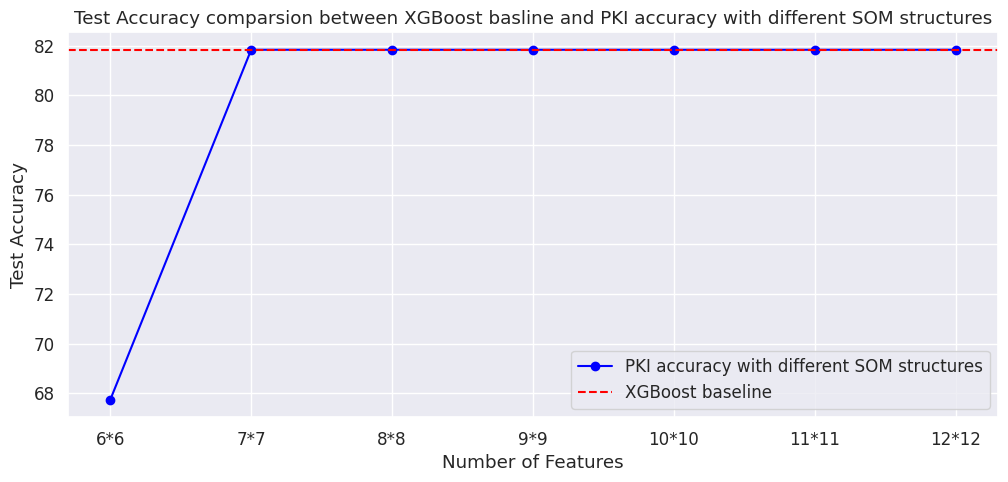

In [ ]:
plt.figure(figsize=(12,5))
l = ['6*6','7*7','8*8','9*9','10*10','11*11','12*12']
plt.plot(l, pki_acc, color='blue', linestyle='-', marker='o', label='PKI accuracy with different SOM structures')
plt.axhline(y=xg_acc*100, color='red', linestyle='--', label='XGBoost baseline')
plt.xlabel('Number of Features')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy comparsion between XGBoost basline and PKI accuracy with different SOM structures')
plt.legend()
plt.grid(True)
plt.show()

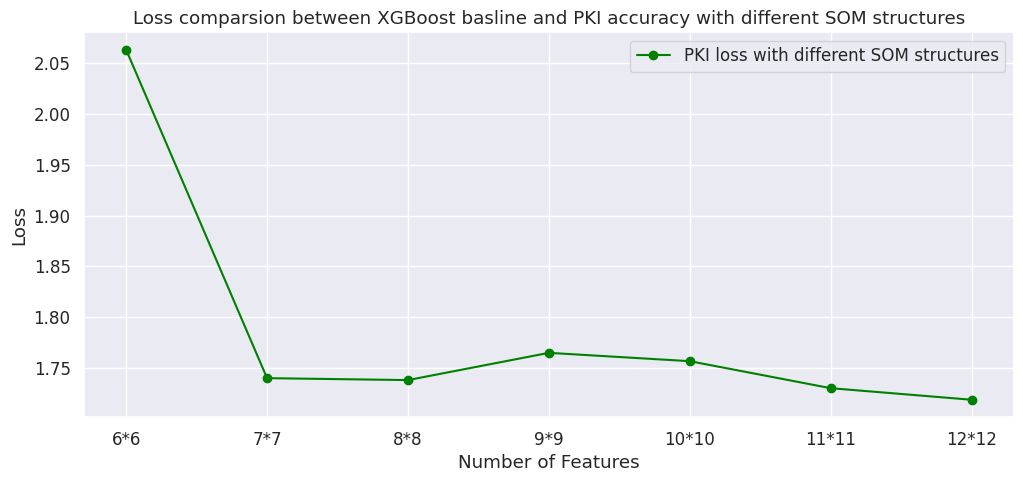

In [ ]:
plt.figure(figsize=(12,5))
l = ['6*6','7*7','8*8','9*9','10*10','11*11','12*12']
plt.plot(l, pki_loss, color='green', linestyle='-', marker='o', label='PKI loss with different SOM structures')
plt.xlabel('Number of Features')
plt.ylabel('Loss')
plt.title('Loss comparsion between XGBoost basline and PKI accuracy with different SOM structures')
plt.legend()
plt.grid(True)
plt.show()

#Q5

In [ ]:
input_dim = train_nn[1].shape[1]  # Number of input features
output_dim = 7
num_hidden_layers = 4
num_neurons = 30
activation_function = 'tanh'
# Hyperparameter values to try
num_hidden_layers_list = [6, 8, 10]  # Try different numbers of hidden layers
num_neurons_list = [15, 20, 40]  # Try different numbers of neurons in each layer

pki_acc_t = []
pki_loss_t = []
best_model_acc = 0
for num_hidden_layers in num_hidden_layers_list:
    for num_neurons in num_neurons_list:
        print(f"Training with {num_hidden_layers} hidden layers and {num_neurons} neurons...")
        model = Sequential()

        model.add(Dense(2, input_dim=input_dim, activation=activation_function, name='input_layer'))

        # Additional hidden layers
        for i in range(num_hidden_layers):
            model.add(Dense(num_neurons, activation=activation_function, name=f'hidden_layer{i+1}'))

        # Output layer
        model.add(Dense(output_dim, activation='softmax', name='output'))

        # Compile the model with Adam optimizer and learning rate of 0.001
        learning_rate = 0.01
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Train the model using the training data
        num_epochs = 5
        batch_size = 32

        history = model.fit(train_nn[6], y_train_oh, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)
        model.summary()
        # Evaluate the model on the test data
        loss, accuracy = model.evaluate(test_nn[6], y_test_oh)
        if accuracy > best_model_acc:
          best_model_acc = accuracy
        pki_acc_t.append(accuracy)
        pki_loss_t.append(loss)

        print(f"PKI Test Loss: {loss} for {num_hidden_layers} hidden layers and {num_neurons} neurons after tuning")
        print(f"PKI Test Accuracy: {accuracy} for {num_hidden_layers} hidden layers and {num_neurons} neurons after tuning")


Training with 6 hidden layers and 15 neurons...
Epoch 1/5
208/208 [==============================] - 3s 7ms/step - loss: 0.7835 - accuracy: 0.6875 - val_loss: 3.3244 - val_accuracy: 0.0000e+00
Epoch 2/5
208/208 [==============================] - 1s 5ms/step - loss: 0.0686 - accuracy: 0.9894 - val_loss: 2.6144 - val_accuracy: 0.0000e+00
Epoch 3/5
208/208 [==============================] - 1s 4ms/step - loss: 0.0557 - accuracy: 0.9894 - val_loss: 2.4235 - val_accuracy: 0.0000e+00
Epoch 4/5
208/208 [==============================] - 1s 4ms/step - loss: 0.8630 - accuracy: 0.7183 - val_loss: 3.8315 - val_accuracy: 0.0000e+00
Epoch 5/5
208/208 [==============================] - 1s 4ms/step - loss: 1.4479 - accuracy: 0.3487 - val_loss: 4.4309 - val_accuracy: 0.0000e+00
Model: "sequential_305"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 2)                 6         
     

In [ ]:
# The best model after tuning is the same as before tuning
print(f'Best accuracy after tuning = accuracy before tuning ---> {best_model_acc*100}%')

Best accuracy after tuning = accuracy before tuning ---> 81.83606266975403%


In [ ]:
# Generate all permutations using itertools.product
from itertools import product
permutations = list(product(num_hidden_layers_list, num_neurons_list))

# Convert each permutation to a string in the format '(num_layers layers, num_neurons neurons)'
permutations_str = [f'({num_layers} L , {num_neurons} N)' for num_layers, num_neurons in permutations]

print(permutations_str)

['(6 L , 15 N)', '(6 L , 20 N)', '(6 L , 40 N)', '(8 L , 15 N)', '(8 L , 20 N)', '(8 L , 40 N)', '(10 L , 15 N)', '(10 L , 20 N)', '(10 L , 40 N)']


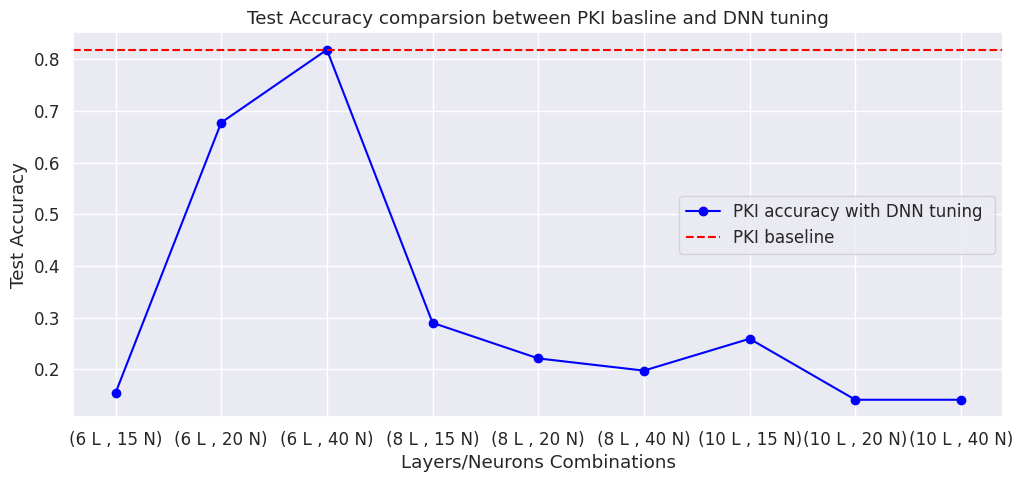

In [ ]:
# L ---> Layers
# N ---> Neurons
# show the L, N combinations accuracies
plt.figure(figsize=(12,5))
plt.plot(permutations_str, pki_acc_t, color='blue', linestyle='-', marker='o', label='PKI accuracy with DNN tuning ')
plt.axhline(y=best_model_acc, color='red', linestyle='--', label='PKI baseline')
plt.xlabel('Layers/Neurons Combinations')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy comparsion between PKI basline and DNN tuning')
plt.legend()
plt.grid(True)
plt.show()